<a href="https://colab.research.google.com/github/LomnaDhar/travelling-salesman-problem/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading required libraries

In [ ]:
! pip install haversine
! pip install python-tsp
! pip install geopandas
! pip install basemap

     |████████████████████████████████| 1.0 MB 11.9 MB/s 
     |████████████████████████████████| 16.7 MB 61.7 MB/s 
     |████████████████████████████████| 6.3 MB 36.3 MB/s 
     |████████████████████████████████| 862 kB 20.9 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 
     |████████████████████████████████| 219 kB 69.2 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=e3a13135bd0285a20dcc3e503db6be1b030499bd196c01da7cb233d00a034d18
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


Importing all the required libraries.

In [ ]:
import random
import math
import time
import haversine as hs
import pandas as pd
import numpy as np
from python_tsp.exact import solve_tsp_dynamic_programming
from geopandas import GeoDataFrame
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Creating random numbers.

In [ ]:
float_nums = [random.random() for i in range(10000)]

Creating a new txt file and writing all the randomly generated numbers into it.

In [ ]:
with open("float_nums.txt", mode = 'w') as out_file:
    for item in float_nums:
        out_file.write(str(item)+"\n")

Reading the data stored in txt file.

In [ ]:
with open("float_nums.txt", mode = 'r') as file:
    con_of_file= [line for line in file]
    new_float= [float(i) for i in con_of_file]
new_float[0:10]

[0.451470624187594,
 0.7412201283763091,
 0.014752592592663594,
 0.3507626072437683,
 0.9891888759535958,
 0.6034466390179235,
 0.44123673843604083,
 0.9385538924577822,
 0.8696943131836129,
 0.9925397239277416]

Insertion sort algorithm.

In [ ]:
def insertion_sort(file_content):
  arr = [float(line) for line in file_content]
  for j in range(1,len(arr)):
    key= arr[j]
    i=j-1
    while i >=0 and key <arr[i]:
      arr[i+1]= arr[i]
      i -= 1
    arr[i+1]=key
  return arr

In [ ]:
file_name= "float_nums"
pa= "{}.txt".format(file_name)
with open(pa, mode="r") as file:
  arr = [line for line in file]
  print(arr[0:10])
  arr2= [float(i) for i in arr]
  print(arr2[0:20])

['0.451470624187594\n', '0.7412201283763091\n', '0.014752592592663594\n', '0.3507626072437683\n', '0.9891888759535958\n', '0.6034466390179235\n', '0.44123673843604083\n', '0.9385538924577822\n', '0.8696943131836129\n', '0.9925397239277416\n']
[0.451470624187594, 0.7412201283763091, 0.014752592592663594, 0.3507626072437683, 0.9891888759535958, 0.6034466390179235, 0.44123673843604083, 0.9385538924577822, 0.8696943131836129, 0.9925397239277416, 0.12670863747651218, 0.6286144269141841, 0.0583829662017894, 0.6225805710129106, 0.6745409169501041, 0.6141982820382041, 0.9307103562112878, 0.6628963624822735, 0.5972717837283772, 0.11710273819912387]


In [ ]:
def mergeSort1(arr):
    if len(arr) > 1:
      mid =len(arr)//2
      L = arr[:mid]
      R = arr[mid:]
      mergeSort1(L)
      mergeSort1(R)

      i=j=k=0

      while i < len(L) and j < len(R):
        if L[i]<R[j]:
          arr[k] = L[i]
          i += 1
        else:
          arr[k] = R[j]
          j += 1
        k += 1
        while i < len(L):
          arr[k] = L[i]
          i += 1
          k += 1 
        while j < len(R):
          arr[k] = R[j]
          j += 1
          k+= 1
    return arr
x= [2,3,6,4]
print(mergeSort1(x))

[2, 3, 4, 6]


Merge sort algorithms.

In [ ]:
def mergeSort(file_content):
  arr = [float(line) for line in file_content]
  def d_c(arr):
    if len(arr) > 1:
      mid =len(arr)//2
      L = arr[:mid]
      R = arr[mid:]
      d_c(L)
      d_c(R)

      i=j=k=0

      while i < len(L) and j < len(R):
        if L[i]<R[j]:
          arr[k] = L[i]
          i += 1
        else:
          arr[k] = R[j]
          j += 1
        k += 1

        while i < len(L):
          arr[k] = L[i]
          i += 1
          k += 1 
        while j < len(R):
          arr[k] = R[j]
          j += 1
          k+= 1
          return arr
  return d_c(arr)          

Computing the run time of insertion sort.

In [ ]:
start = time.time()
print(insertion_sort(con_of_file))
end = time.time()
print("Run time of Insertion Sort:",end - start)

[0.0001136958423997303, 0.00018008148087123033, 0.00018656615728451786, 0.0002053824134830018, 0.0003253854140736756, 0.0005245715282212737, 0.0007236587033322417, 0.0007258066498756488, 0.0007612057269948957, 0.0009179165640682552, 0.0010807719569885244, 0.0010825945814593174, 0.0010906117260318648, 0.001334438545107619, 0.001368812993726043, 0.0015906749844402102, 0.0019000172311203212, 0.0019450046423357126, 0.0020212694498354944, 0.002083621028671656, 0.0022173731707656463, 0.0022943295534717523, 0.0023217639155127534, 0.002357533613505658, 0.002449690234893276, 0.002508465643567881, 0.0025834569343292646, 0.0026969388460651444, 0.0027262684982284346, 0.002772166240429863, 0.002839876287400789, 0.0028836807126467745, 0.0028920364819118305, 0.003091555134552726, 0.0032763204476270458, 0.003471199664099922, 0.003793415046535187, 0.003977169430157468, 0.003989172892899573, 0.004149510166597814, 0.004251847892281169, 0.004434948658516347, 0.004492715760078703, 0.004649557837015705, 0.0

Computing the run time of Merge sort.

In [ ]:
start = time.time()
print(mergeSort(con_of_file))
end = time.time()
print("Run time of Merge Sort:", end - start)

[0.0001136958423997303, 0.0002053824134830018, 0.0015906749844402102, 0.0019450046423357126, 0.014752592592663594, 0.451470624187594, 0.7412201283763091, 0.3507626072437683, 0.44123673843604083, 0.6034466390179235, 0.44123673843604083, 0.9385538924577822, 0.8696943131836129, 0.0583829662017894, 0.12670863747651218, 0.6286144269141841, 0.0583829662017894, 0.6225805710129106, 0.6745409169501041, 0.6141982820382041, 0.9307103562112878, 0.6628963624822735, 0.5972717837283772, 0.11710273819912387, 0.19184894128950103, 0.4395919725576214, 0.7801526451825881, 0.8065189133550638, 0.5918533341758063, 0.15280637385385154, 0.6744649236010319, 0.35089118686468035, 0.33923516954415944, 0.32918936774070573, 0.2157813512358614, 0.8497783070124538, 0.639355760695367, 0.0019450046423357126, 0.5831220777429335, 0.3076813180223471, 0.9322533084309091, 0.9210711613154854, 0.005906420401452617, 0.02356757952920463, 0.016574558915281923, 0.8519402312301491, 0.25404127519594255, 0.005906420401452617, 0.83994

**2 Travelling Salesman Problem**

Reading the data from the given dataset.

In [ ]:
data = pd.read_csv('/content/10 cities in Europe Data - Sheet1.csv')
print(type(data))
print(data.head)

<class 'pandas.core.frame.DataFrame'>
<bound method NDFrame.head of   European Cities   latitude  ...  GDP (bln Euros) Number of foreign residents
0           Paris  48.856600  ...           685.67                     586,163
1          London  51.507200  ...           801.66                   2,998,264
2          Madrid  40.416800  ...           221.43                     405,233
3          Berlin  52.520000  ...           184.15                   1,000,000
4           Milan  45.464664  ...           207.55                     277,773
5       Barcelona  41.387400  ...           163.83                     333,516
6            Rome  41.902800  ...           163.14                     556,826
7          Munich  48.135100  ...           189.16                     421,832
8       Amsterdam  52.367600  ...           172.57                     110,000
9       Stockholm  59.329300  ...           148.61                     248,708

[10 rows x 8 columns]>


Extracting the locations of cities

In [ ]:
paris= (data.iloc[0,1],data.iloc[0,2])
london = (data.iloc[1,1],data.iloc[1,2])
madrid = (data.iloc[2,1],data.iloc[2,2])
berlin = (data.iloc[3,1],data.iloc[3,2])
milan = (data.iloc[4,1],data.iloc[4,2])
barcelona = (data.iloc[5,1],data.iloc[5,2])
rome = (data.iloc[6,1],data.iloc[6,2])
munich = (data.iloc[7,1],data.iloc[7,2])
amsterdam = (data.iloc[8,1],data.iloc[8,2])
stockholm = (data.iloc[9,1],data.iloc[9,2])

Haversine distance matrix.

In [ ]:
dist_mat= hs.haversine_vector([paris,london,madrid,berlin,milan,barcelona,rome,munich,amsterdam,stockholm],[paris,london,madrid,berlin,milan,barcelona,rome,munich,amsterdam,stockholm],unit="km",comb=True)
print(dist_mat)

[[   0.          334.56390524  944.49485615  877.46453792  639.44568801
   830.66249422 1105.28167539  684.39215925  429.86198345 1543.54878864]
 [ 334.56390524    0.         1263.39555388  914.30233172  945.98284051
  1135.96346076 1420.95498794  901.95816374  341.06569782 1420.20093887]
 [ 944.49485615 1263.39555388    0.         1534.15875075  716.83429336
   168.20753907  754.0292845  1061.77871074 1332.00494237 2329.89520155]
 [ 877.46453792  914.30233172 1534.15875075    0.          842.31413524
  1499.43295769 1182.54782954  504.41602813  576.08799564  810.5094069 ]
 [ 639.44568801  945.98284051  716.83429336  842.31413524    0.
   725.42413125  476.99295402  348.33296437  828.59672653 1651.83781512]
 [ 830.66249422 1135.96346076  168.20753907 1499.43295769  725.42413125
     0.          859.56033704 1054.61217741 1238.28324735 2278.4933012 ]
 [1105.28167539 1420.95498794  754.0292845  1182.54782954  476.99295402
   859.56033704    0.          696.70346852 1295.95141214 1975.549

Tsp algorithm using dynamic problem.

In [ ]:
permutation, distance = solve_tsp_dynamic_programming(dist_mat)
print(permutation)
print(distance)

[0, 5, 2, 6, 4, 7, 3, 9, 8, 1]
5694.065799051272


Finding the shortest path.

In [ ]:
coor= []
for i in permutation:
  long_lat= (data.iloc[i,2],data.iloc[i,1])
  coor.append(long_lat)

coor.append(coor[0])
geom= LineString(coor)
short_path=gpd.GeoSeries(geom)

<class 'geopandas.geoseries.GeoSeries'>


Converting the Long-lat column into geometry class.

In [ ]:
geometry = [Point(xy) for xy in zip(data.longitude, data.latitude)]
data1 = GeoDataFrame(data, geometry=geometry)
print(data1.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
  European Cities  ...                   geometry
0           Paris  ...   POINT (2.35220 48.85660)
1          London  ...   POINT (0.12760 51.50720)
2          Madrid  ...   POINT (3.70380 40.41680)
3          Berlin  ...  POINT (13.40500 52.52000)
4           Milan  ...   POINT (9.18854 45.46466)

[5 rows x 9 columns]


Plot of the city, Locations and Shortest path.

<function matplotlib.pyplot.show>

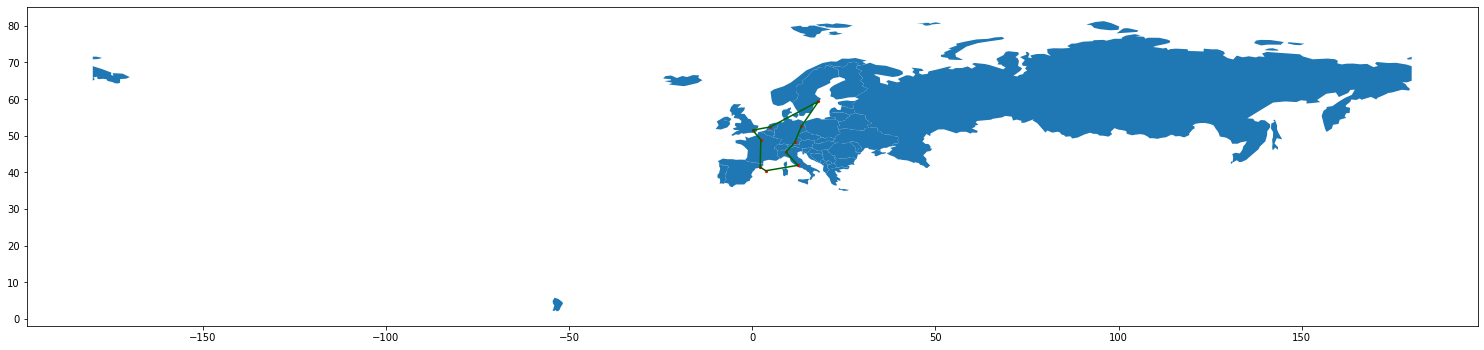

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe=world[world["continent"]=="Europe"]
short_path.plot(ax= data1.plot(ax=europe.plot(figsize=(26,20)),marker='o', color='red', markersize=5),color="darkgreen")
plt.show